In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
train_data = pd.read_csv("train_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
display(train_data.head())
print(train_data.shape)


test_data = pd.read_csv("test_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
print(display(test_data.head()))
print(test_data.shape)

test_solution_data = pd.read_csv("test_data_solution.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
print(display(test_solution_data.head()))
print(test_solution_data.shape)

<ipython-input-3-19929f9b5ee4>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv("train_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


(9560, 4)


<ipython-input-3-19929f9b5ee4>:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv("test_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


None
(11521, 4)


<ipython-input-3-19929f9b5ee4>:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_solution_data = pd.read_csv("test_data_solution.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


None
(9623, 4)


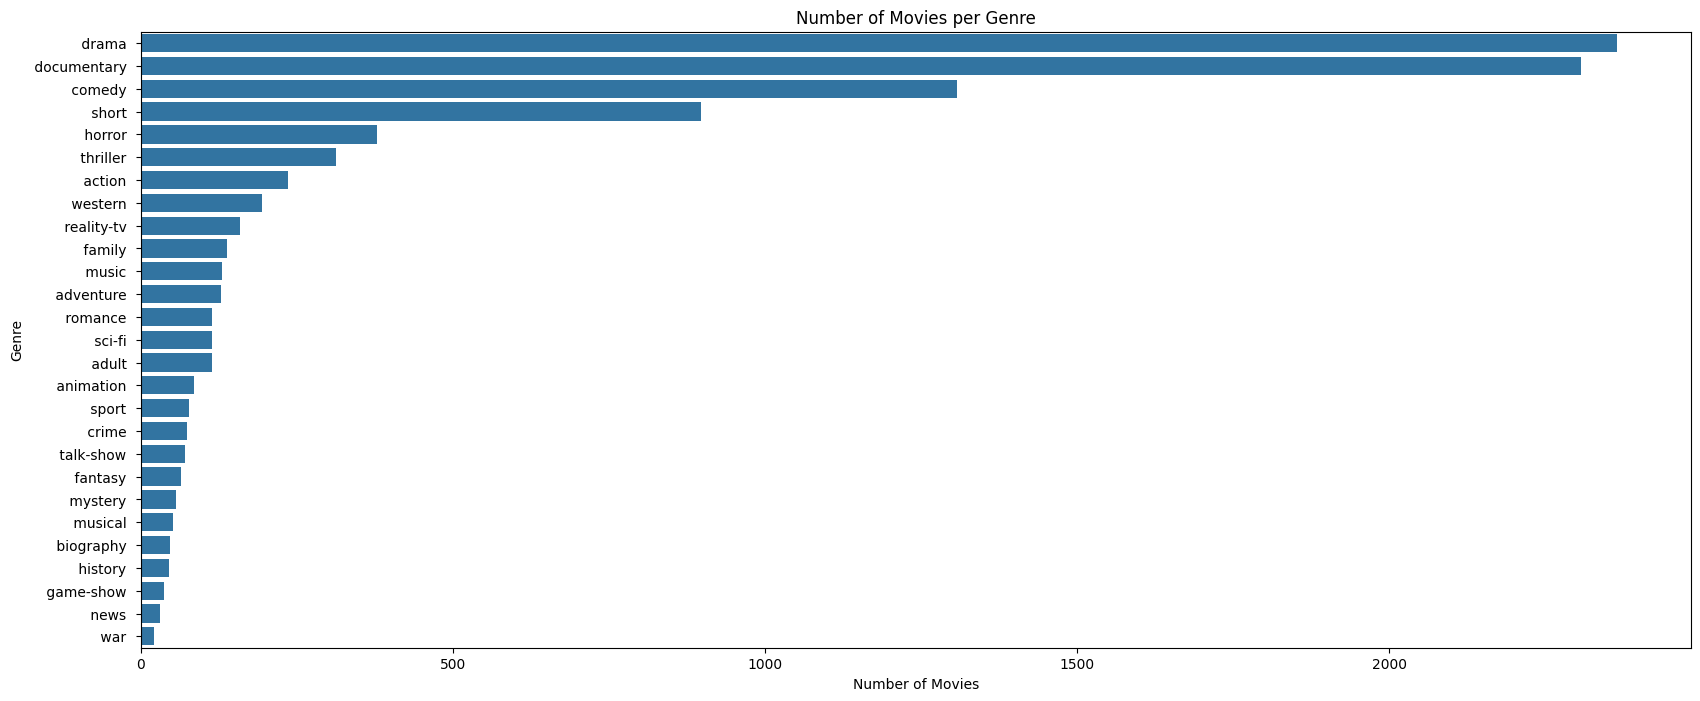

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(y=train_data['GENRE'], order = train_data['GENRE'].value_counts().index)
plt.title('Number of Movies per Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

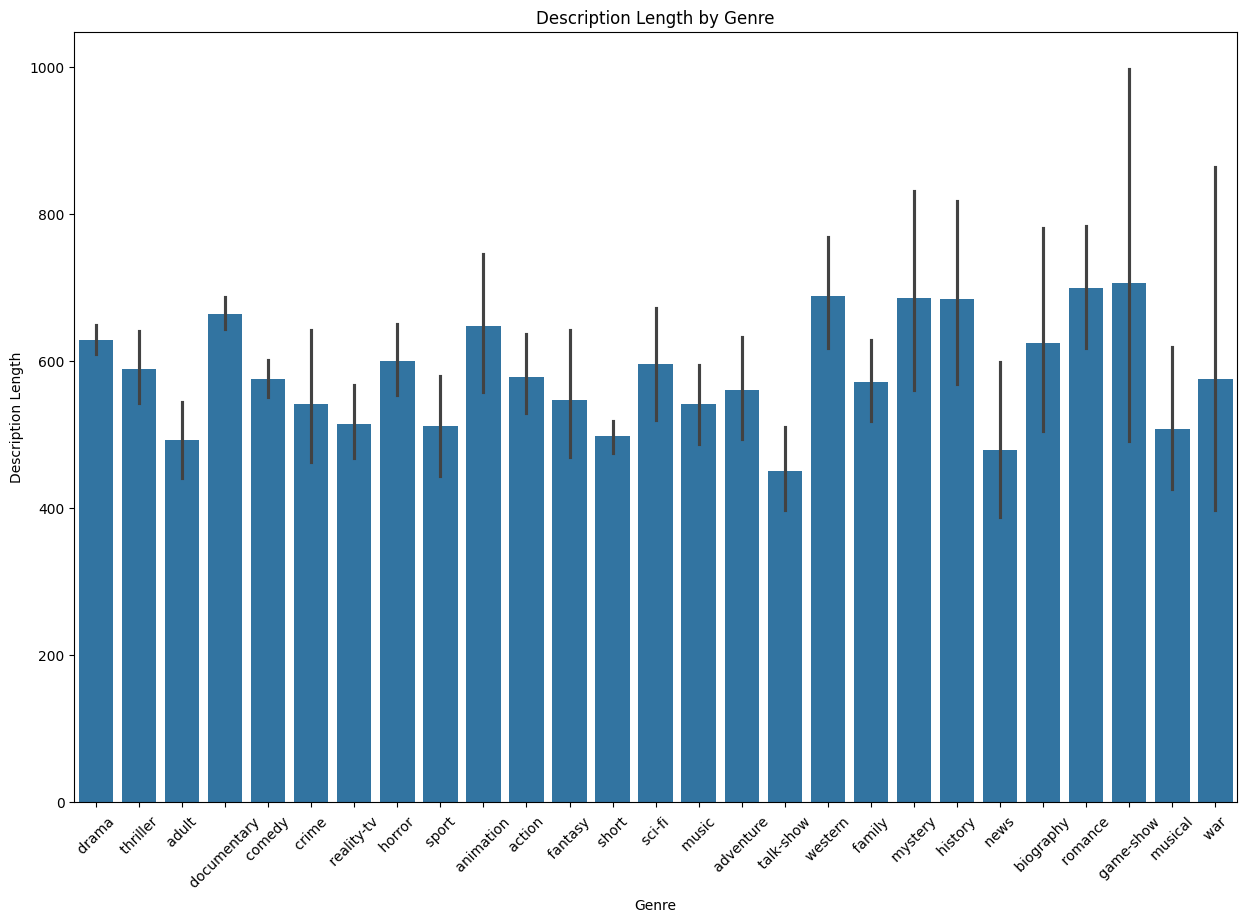

In [ ]:
train_data['DESCRIPTION_length'] = train_data['DESCRIPTION'].apply(len)
plt.figure(figsize=(15, 10))
sns.barplot(x='GENRE', y='DESCRIPTION_length', data=train_data)
plt.title('Description Length by Genre')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Description Length')
plt.show()

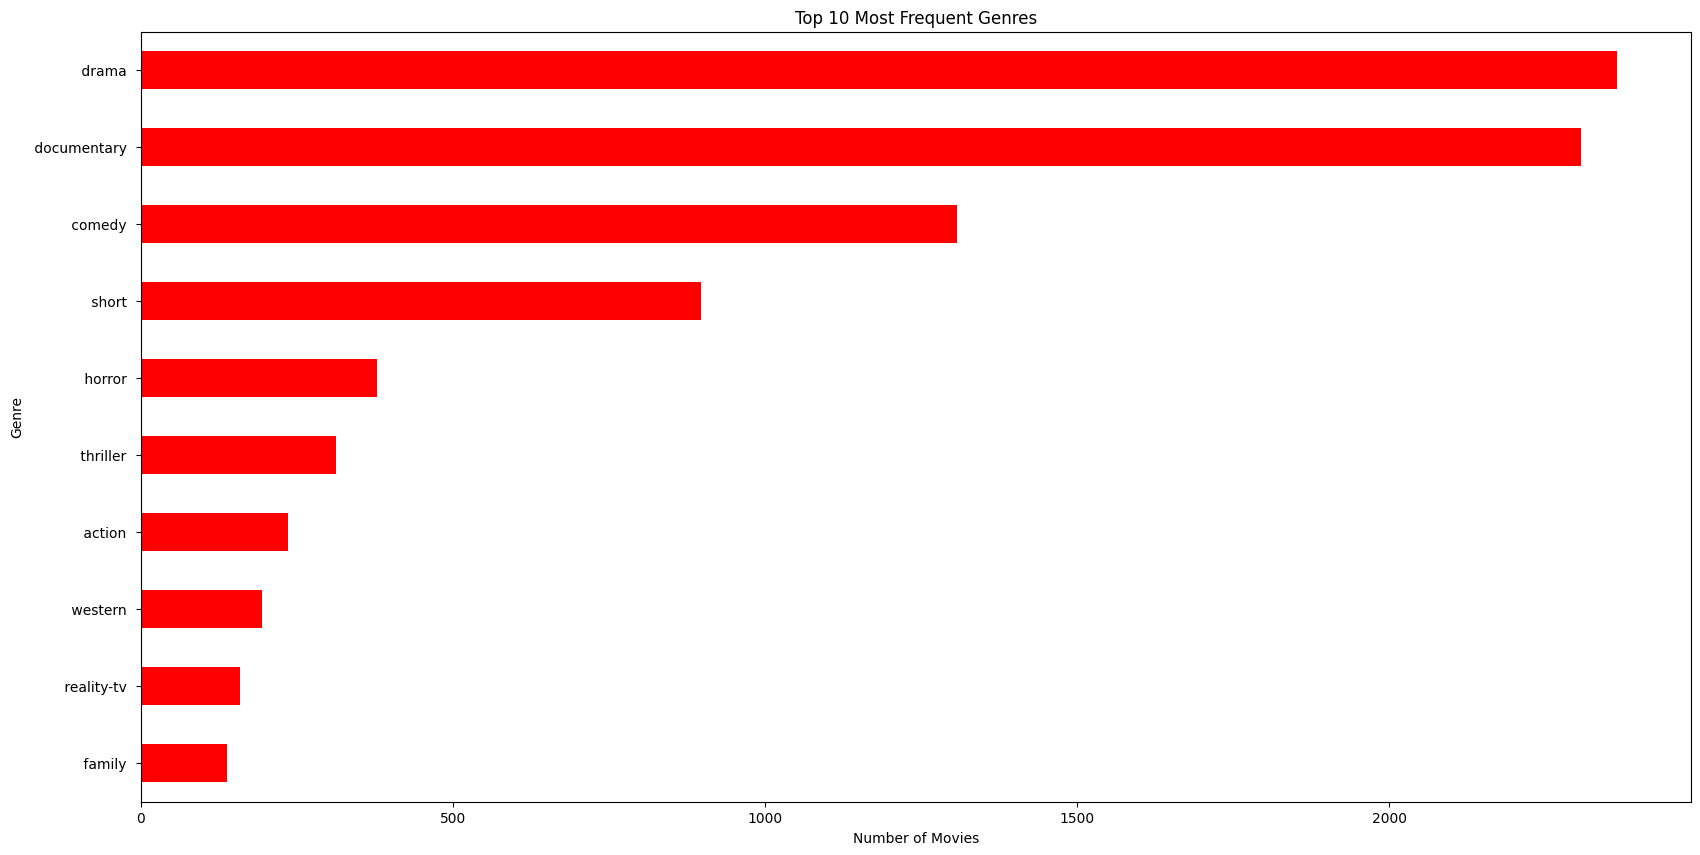

In [ ]:
# Handle any potential missing values
train_data['DESCRIPTION'].fillna("", inplace=True)
test_data['DESCRIPTION'].fillna("", inplace=True)

t_v = TfidfVectorizer(stop_words='english', max_features=100000)
X_train = t_v.fit_transform(train_data['DESCRIPTION'])
X_test = t_v.transform(test_data['DESCRIPTION'])

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['GENRE'])
y_test = label_encoder.transform(test_solution_data['GENRE'])

In [ ]:
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

clf = LinearSVC()
clf.fit(X_train_sub, y_train_sub)

y_val_pred = clf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

Validation Accuracy: 0.5240585774058577
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.16      0.23        58
           1       0.43      0.14      0.21        21
           2       0.40      0.06      0.11        31
           3       0.25      0.08      0.12        13
           4       0.00      0.00      0.00        10
           5       0.45      0.48      0.47       267
           6       0.00      0.00      0.00        22
           7       0.60      0.81      0.69       477
           8       0.51      0.72      0.60       472
           9       0.00      0.00      0.00        30
          10       0.00      0.00      0.00        15
          11       1.00      0.80      0.89         5
          12       0.00      0.00      0.00         8
          13       0.64      0.62      0.63        72
          14       0.55      0.38      0.44        16
          15       0.00      0.00      0.00         7
      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.naive_bayes import MultinomialNB
Mnb_classifier = MultinomialNB()
Mnb_classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
Mnb_classifier.predict(X_test)

array([8, 8, 8, ..., 8, 8, 8])

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(max_iter=500)
lr_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [ ]:

lr_classifier.predict(X_test)

array([7, 7, 7, ..., 7, 7, 7])

In [ ]:
def predict_movie(description):
    t_v1 = t_v.transform([description])
    pred_label = clf.predict(t_v1)
    return label_encoder.inverse_transform(pred_label)[0]

sample_descr_for_movie = "A movie where police cashes the criminal and shoot him"
print(predict_movie(sample_descr_for_movie))

sample_descr_for_movie1 = "A movie where person cashes a girl too get marry with him but girl refuses him."
print(predict_movie(sample_descr_for_movie1))

 thriller 
 comedy 


<ipython-input-19-32c9b63be542>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data[train_data['GENRE'].isin(top_genres)], x='GENRE', y='ID', palette='Set2', order=top_genres)


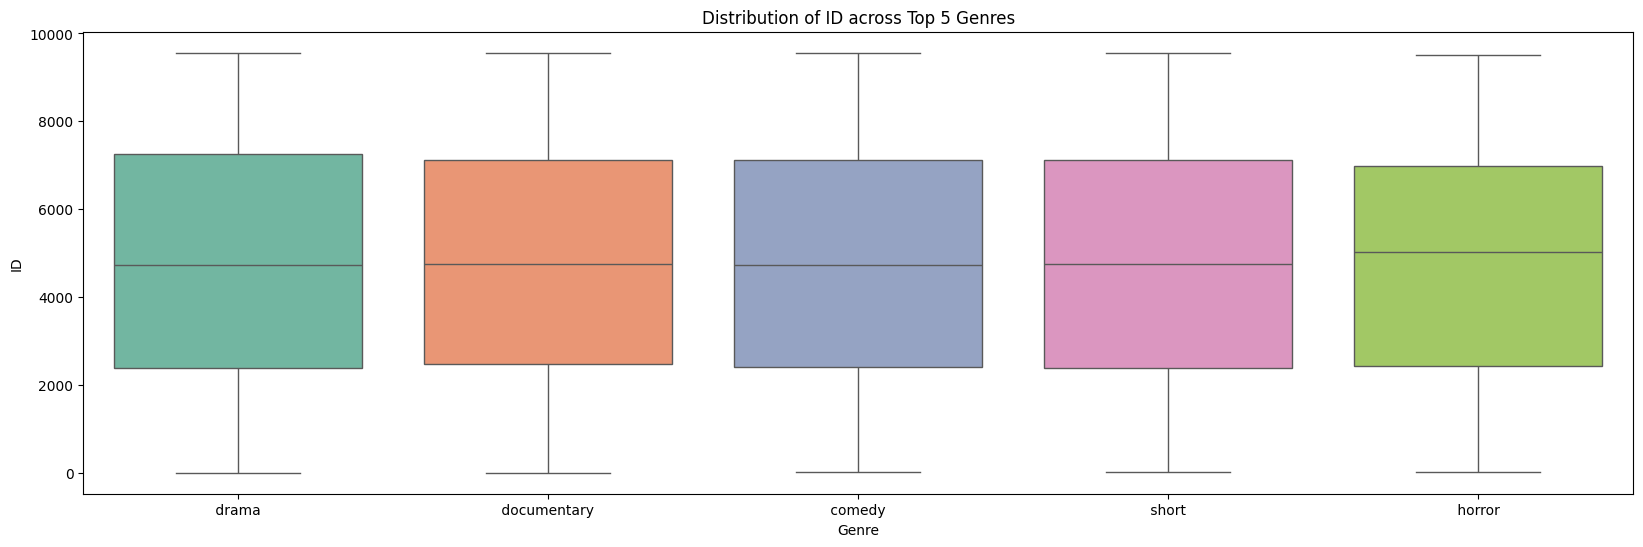

In [ ]:
top_genres = train_data['GENRE'].value_counts().nlargest(5).index
plt.figure(figsize=(20, 6))
sns.boxplot(data=train_data[train_data['GENRE'].isin(top_genres)], x='GENRE', y='ID', palette='Set2', order=top_genres)
plt.title('Distribution of ID across Top 5 Genres')
plt.xlabel('Genre')
plt.ylabel('ID')
plt.show()

<ipython-input-20-ce509d0968d1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=train_data[train_data['GENRE'].isin(top_genres)], x='GENRE', y='ID', palette='coolwarm', order=top_genres)


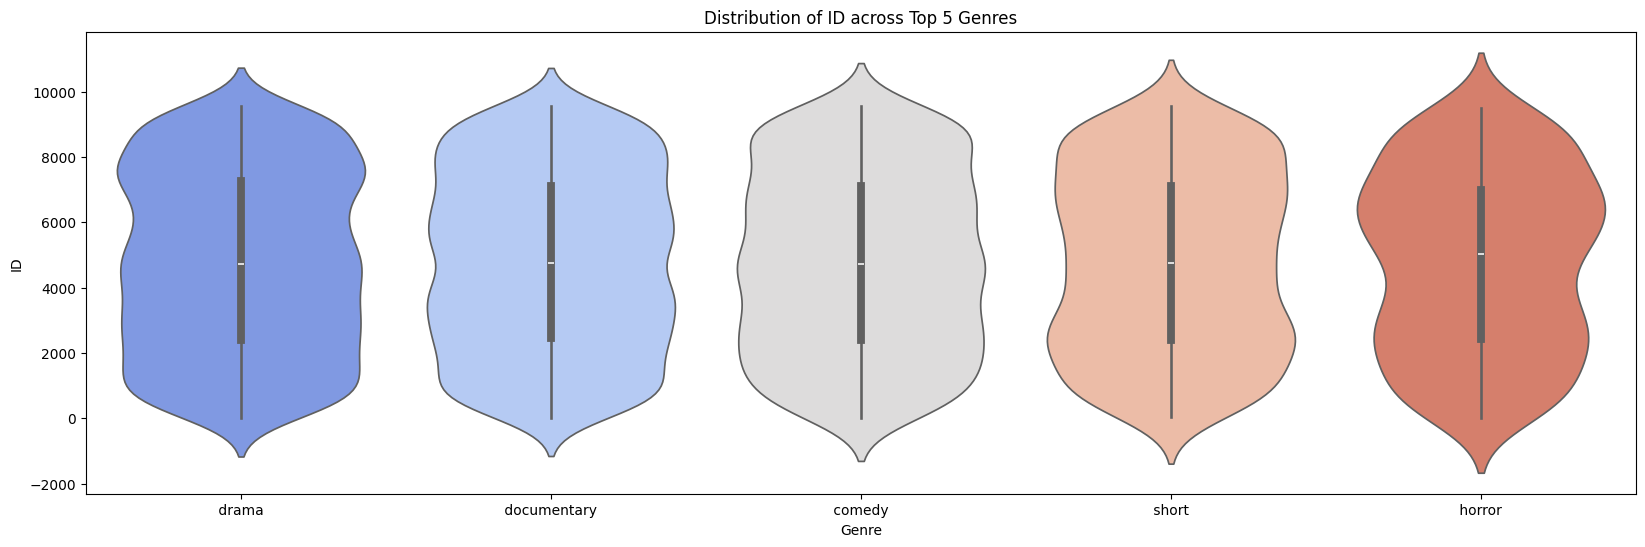

In [ ]:
top_genres = train_data['GENRE'].value_counts().nlargest(5).index
plt.figure(figsize=(20, 6))
sns.violinplot(data=train_data[train_data['GENRE'].isin(top_genres)], x='GENRE', y='ID', palette='coolwarm', order=top_genres)
plt.title('Distribution of ID across Top 5 Genres')
plt.xlabel('Genre')
plt.ylabel('ID')
plt.show()

In [ ]:
tf = TfidfVectorizer(max_features=1000)
x_tr = tf.fit_transform(train_data['DESCRIPTION'])
LE = LabelEncoder()
y_tr = LE.fit_transform(train_data['GENRE'])
y_ts = LE.fit_transform(test_solution_data['GENRE'])

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(x_tr, y_tr, test_size=0.2, random_state=42)

In [ ]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
lr_pred = lr_model.predict(X_test)
y_test_genre = LE.inverse_transform(y_test)
y_pred_genre = LE.inverse_transform(lr_pred)

In [1]:
from sklearn.metrics import classification_report
print(classification_report(y_test_genre, y_pred_genre, zero_division=1))

NameError: name 'y_test_genre' is not defined

In [ ]:
sv_model = LinearSVC()
sv_model.fit(X_train, y_train)

LinearSVC()

In [ ]:
sv_pred = sv_model.predict(X_test)
y_test_genre = LE.inverse_transform(y_test)
y_pred_genre = LE.inverse_transform(sv_pred)

In [ ]:
print(classification_report(y_test_genre, y_pred_genre, zero_division=1))

               precision    recall  f1-score   support

      action        0.23      0.10      0.14        58
       adult        0.44      0.19      0.27        21
   adventure        0.00      0.00      0.00        31
   animation        0.14      0.08      0.10        13
   biography        1.00      0.00      0.00        10
      comedy        0.38      0.44      0.41       267
       crime        1.00      0.00      0.00        22
 documentary        0.64      0.80      0.71       477
       drama        0.51      0.65      0.57       472
      family        0.00      0.00      0.00        30
     fantasy        1.00      0.00      0.00        15
   game-show        1.00      0.80      0.89         5
     history        1.00      0.00      0.00         8
      horror        0.44      0.49      0.46        72
       music        0.33      0.31      0.32        16
     musical        0.00      0.00      0.00         7
     mystery        0.00      0.00      0.00        11
        n

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
nb_pred = nb_model.predict(X_test)
y_test_genre = LE.inverse_transform(y_test)
y_pred_genre = LE.inverse_transform(nb_pred)

In [ ]:
print(classification_report(y_test_genre, y_pred_genre, zero_division=1))

               precision    recall  f1-score   support

      action        1.00      0.00      0.00        58
       adult        1.00      0.00      0.00        21
   adventure        1.00      0.00      0.00        31
   animation        1.00      0.00      0.00        13
   biography        1.00      0.00      0.00        10
      comedy        0.50      0.21      0.29       267
       crime        1.00      0.00      0.00        22
 documentary        0.55      0.87      0.67       477
       drama        0.39      0.85      0.53       472
      family        1.00      0.00      0.00        30
     fantasy        1.00      0.00      0.00        15
   game-show        1.00      0.00      0.00         5
     history        1.00      0.00      0.00         8
      horror        1.00      0.03      0.05        72
       music        1.00      0.00      0.00        16
     musical        1.00      0.00      0.00         7
     mystery        1.00      0.00      0.00        11
        n

In [ ]:
lr_accuracy = accuracy_score(y_test, lr_pred)
sv_accuracy = accuracy_score(y_test, sv_pred)
nb_accuracy = accuracy_score(y_test, nb_pred)
print("Logistic Regression Accuracy:", lr_accuracy)
print("SVM Accuracy:", sv_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)

Logistic Regression Accuracy: 0.5125523012552301
SVM Accuracy: 0.49843096234309625
Naive Bayes Accuracy: 0.45868200836820083


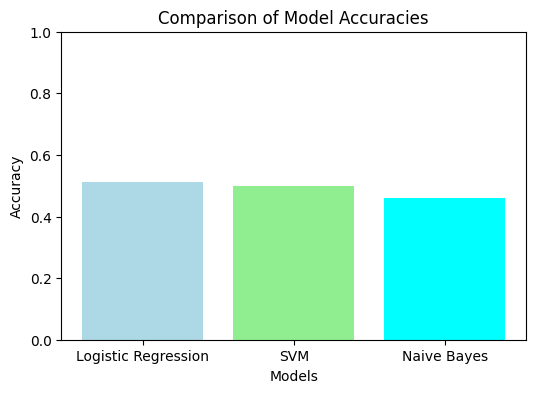

In [ ]:
accuracies = [lr_accuracy, sv_accuracy, nb_accuracy]
models = ['Logistic Regression', 'SVM', 'Naive Bayes']
plt.figure(figsize=(6, 4))
plt.bar(models, accuracies, color=['lightblue', 'lightgreen', 'cyan'])
plt.ylim(0, 1)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()

In [ ]:
def predict_movie(description):
    vec = tf.transform([description])
    pred = lr_model.predict(vec)
    return LE.inverse_transform(pred)[0]

user_input = input("Enter a movie description: ")
predicted_genre = predict_movie(user_input)
print(f"The predicted genre for the movie '{user_input}' is: {predicted_genre}")

Enter a movie description: good
The predicted genre for the movie 'good' is:  comedy 
